<a href="https://www.kaggle.com/code/rachelfreeland/chess-board?scriptVersionId=94866404" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # allows for visualization of a concept such as grids and charts

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Define a `ChessBoard` class that contains an 8x8 grid
#### Each cell in grid should have a color represented in RGB format.
* black = (0,0,0)
* white = (1,1,1)
* blue = (0,1,1)
* red = (1,.2,0)
#### Needs a place to stuff the coords one for each queen

### define an `add_red()` method:
* should take in a row and a column
* stuff these coords into the queen holder

### define an `add_blue()` method:
* should behave just like the add_red method but, for the blue queen

### define a `render()` method:
* this displays the chessboard with the given coords for each queen

### define an `is_under_attack()` method:
* Uses the numpy absolute method to determine when an attack is under way

In [2]:
white = (1.,1.,1.)
black = (0., 0., 0.)
red = (1., .2, 1.)
blue = (0., 1., 1.)
class ChessBoard:

    def __init__(self):

        self.board = np.full((8, 8, 3), white)
        self.board[::2, 1::2] = black
        self.board[1::2, ::2] = black
        self.queen_of_hearts = []
        self.ice_queen = []
        
    def add_red(self, row, col):
        self.queen_of_hearts = (row, col)
        self.board[row, col] = red
    
    def add_blue(self, row, col):
        self.ice_queen = (row, col)
        self.board[row, col] = blue
        
    def render(self):
        plt.title("Chess Anyone?")
        plt.imshow(self.board)
    
    def is_under_attack(self):
        x1, y1 = self.queen_of_hearts
        x2, y2 = self.ice_queen
        abs_x = np.absolute(x1 - x2)
        abs_y = np.absolute(y1 - y2)
        
        if (abs_x == abs_y) or (abs_x == 0) or (abs_y == 0):
            return True
        else:
            return  False
        
        
        


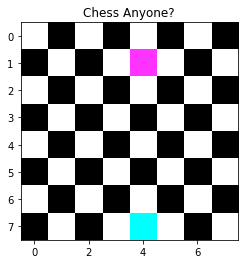

In [3]:
board = ChessBoard()
board.add_red(1, 4)
board.add_blue(7, 4)
board.render()

assert board.is_under_attack() == True
 
#ATTACK    same column / abs_x == 0 / vertical 

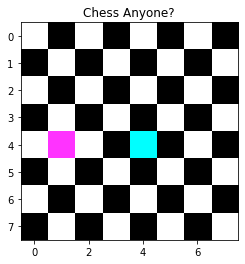

In [4]:
board = ChessBoard()
board.add_red(4, 1)
board.add_blue(4, 4)
board.render()

assert board.is_under_attack() == True
#ATTACK   same row / abs_y == 0 / horizontal

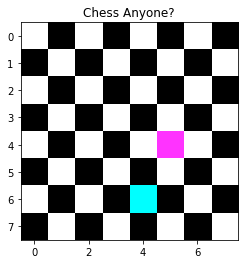

In [5]:
board = ChessBoard()
board.add_red(4, 5)
board.add_blue(6, 4)
board.render()

assert board.is_under_attack() == False
#Not an attack    abs_x == 2 and abs_y == 1

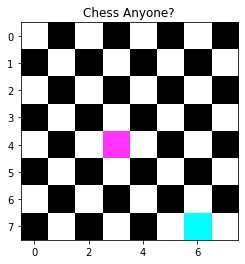

In [6]:
board = ChessBoard()
board.add_red(4, 3)
board.add_blue(7,6)
board.render()

assert board.is_under_attack() == True 
#ATTACK  abs_x == 3 and abs_y == 3

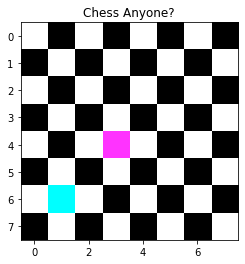

In [7]:
board = ChessBoard()
board.add_red(4,3)
board.add_blue(6, 1)
board.render()

assert board.is_under_attack() == True

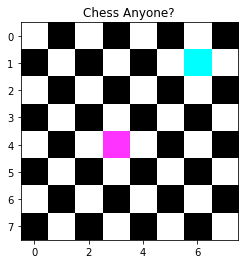

In [8]:
board = ChessBoard()
board.add_red(4, 3)
board.add_blue(1, 6)
board.render()

assert board.is_under_attack() == True

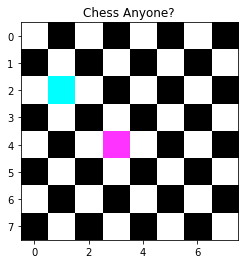

In [9]:
board = ChessBoard()
board.add_red(4, 3)
board.add_blue(2, 1)
board.render()

assert board.is_under_attack() == True